# Convolutional Neural Networks

In [201]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
from keras.datasets import cifar10

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, AvgPool2D, Flatten, Activation
import keras.backend as K

### Load CIFAR-10 dataset (Canadian Institute For Advanced Research)

In [204]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [205]:
print (X_train.shape)
print (X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=0.2)

In [208]:
print (X_train.shape)
print (X_test.shape)

(20000, 32, 32, 3)
(5000, 32, 32, 3)


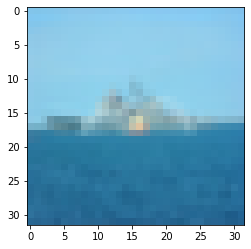

In [209]:
plt.imshow(X_train[21])

In [210]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [211]:
X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)

In [212]:
X_train.shape

(20000, 3072)

In [213]:
y_train.shape

(20000, 1)

In [214]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [215]:
y_train_cat.shape

(20000, 10)

### Dense Network Layers

In [228]:
K.clear_session()

In [229]:
model_dnl = Sequential()
model_dnl.add(Dense(512, input_dim=32*32*3, activation='relu'))
model_dnl.add(Dense(256, activation='relu'))
model_dnl.add(Dense(128, activation='relu'))
model_dnl.add(Dense(32, activation='relu'))
model_dnl.add(Dense(10, activation='softmax'))
model_dnl.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [230]:
model_dnl.fit(X_train, y_train_cat, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/5
16000/16000 [==============================] - 10s 613us/step - loss: 2.3786 - acc: 0.0968 - val_loss: 2.3027 - val_acc: 0.0968
Epoch 2/5
16000/16000 [==============================] - 8s 520us/step - loss: 2.3025 - acc: 0.1016 - val_loss: 2.3030 - val_acc: 0.0960
Epoch 3/5
16000/16000 [==============================] - 9s 569us/step - loss: 2.3025 - acc: 0.1014 - val_loss: 2.3031 - val_acc: 0.0960
Epoch 4/5
16000/16000 [==============================] - 9s 546us/step - loss: 2.3024 - acc: 0.1045 - val_loss: 2.3033 - val_acc: 0.0960
Epoch 5/5
16000/16000 [==============================] - 9s 545us/step - loss: 2.3024 - acc: 0.1045 - val_loss: 2.3033 - val_acc: 0.0960


In [231]:
model_dnl.evaluate(X_test, y_test_cat)

5000/5000 [==============================] - 1s 122us/step


[2.3028757446289063, 0.1026]

### Image filters with convolutions

In [232]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [233]:
img = misc.ascent()

In [234]:
img.shape

(512, 512)

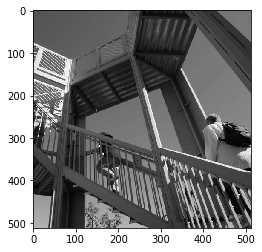

In [235]:
plt.imshow(img, cmap='gray')

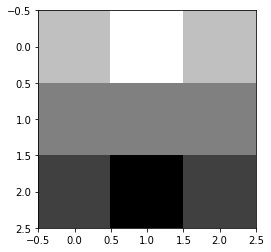

In [236]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])
plt.imshow(h_kernel, cmap='gray')

##### Convolution Step

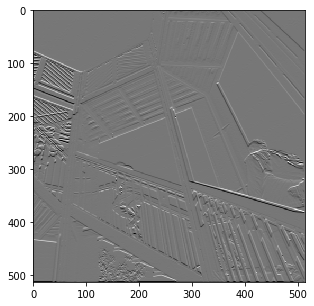

In [237]:
res = convolve2d(img, h_kernel)

plt.figure(figsize=(5, 5))
plt.imshow(res, cmap='gray')

#### Stride

In [256]:
img_tensor = img.reshape((1, 512, 512, 1))

In [257]:
model_stride = Sequential()
model_stride.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model_stride.compile('adam', 'mse')

In [258]:
img_pred_tensor = model_stride.predict(img_tensor)

In [259]:
img_pred = img_pred_tensor[0, :, :, 0]

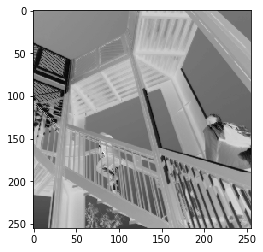

In [260]:
plt.imshow(img_pred, cmap='gray')

#### Pooling Layers

In [262]:
model_pool = Sequential()
model_pool.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model_pool.compile('adam', 'mse')

In [263]:
img_pred = model_pool.predict(img_tensor)[0, :, :, 0]

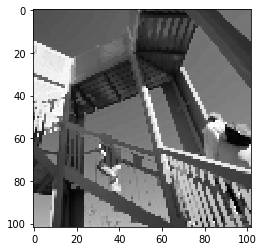

In [264]:
plt.imshow(img_pred, cmap='gray')

In [265]:
model_pool = Sequential()
model_pool.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model_pool.compile('adam', 'mse')

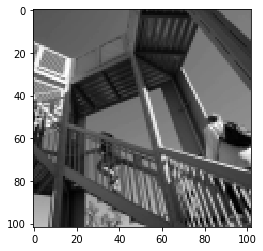

In [266]:
img_pred = model_pool.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

## Convolution Neural Network

In [ ]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [ ]:
X_train.shape

### Reset and Initialising the CNN

In [178]:
K.clear_session()
model = Sequential()

### Convolution

#### Convolution Layer - ConvNet1

In [179]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3),activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

#### Convolution Layer - ConvNet2

In [180]:
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

Exception ignored in: <function BaseSession._Callable.__del__ at 0x1a37ceaef0>
Traceback (most recent call last):
  File "/Users/Pramod/anaconda/envs/ztdl/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/Users/Pramod/anaconda/envs/ztdl/lib/python3.7/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 140633956139120


#### Fully Connected Layer

In [181]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Model Archtecture

In [182]:
model.layers

In [183]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

### Compiling and Evaluating the CNN

In [184]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [185]:
# model.fit(X_train, y_train_cat,
#           batch_size=32,
#           epochs=10,
#           validation_data=(X_test, y_test_cat),
#           shuffle=True)

In [186]:
model.fit(X_train, y_train_cat, 
          batch_size=32,
          epochs=10,
          validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 60s 4ms/step - loss: 1.7422 - acc: 0.3701 - val_loss: 1.4057 - val_acc: 0.4908
Epoch 2/10
16000/16000 [==============================] - 58s 4ms/step - loss: 1.2919 - acc: 0.5446 - val_loss: 1.2544 - val_acc: 0.5433
Epoch 3/10
16000/16000 [==============================] - 57s 4ms/step - loss: 1.0445 - acc: 0.6311 - val_loss: 1.2415 - val_acc: 0.5723
Epoch 4/10
16000/16000 [==============================] - 57s 4ms/step - loss: 0.8484 - acc: 0.7016 - val_loss: 0.9720 - val_acc: 0.6680
Epoch 5/10
16000/16000 [==============================] - 57s 4ms/step - loss: 0.6678 - acc: 0.7652 - val_loss: 1.0874 - val_acc: 0.6535
Epoch 6/10
16000/16000 [==============================] - 57s 4ms/step - loss: 0.4953 - acc: 0.8240 - val_loss: 1.1073 - val_acc: 0.6613
Epoch 7/10
16000/16000 [==============================] - 57s 4ms/step - loss: 0.3438 - acc: 0.8826 - val_loss: 1.2795 - val_acc:

#### Evaluate on Test Set

In [187]:
model.evaluate(X_test, y_test_cat)

5000/5000 [==============================] - 6s 1ms/step


[1.8510023818969727, 0.6492]

## Visualize Filters

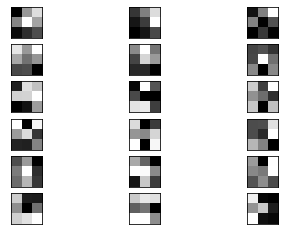

In [189]:
# cannot easily visualize filters lower down
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

## Visualize Activation/Feature Maps

In [ ]:
# plot feature map of first conv layer for given image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [ ]:
plt.imshow(X_train[21])

#### Displaying output of layer 1

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


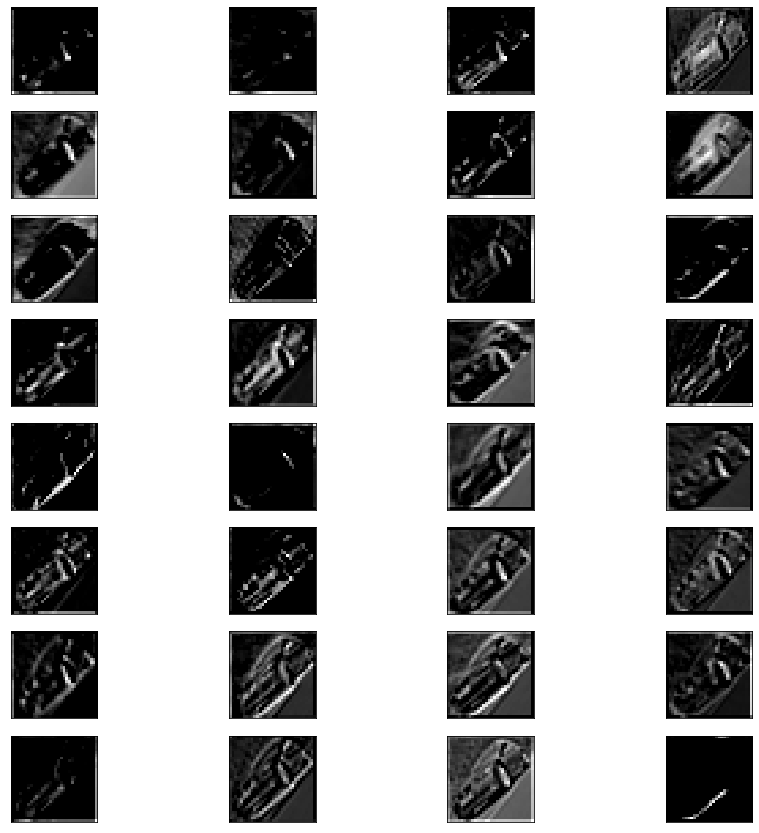

In [190]:
# redefine model to output right after the first hidden layer
modelf = Model(inputs=model.inputs, outputs=model.layers[0].output)
modelf.summary()

# expand dimensions so that it represents a single 'sample'
img = expand_dims(X_train[21], axis=0)

# get feature map for first hidden layer
feature_maps = modelf.predict(img)

# plot all 32 maps
square = 8
ix = 1
pyplot.figure(figsize=(15,15))
for i in range(square):
    # specify subplot and turn of axis
    for j in range(4):
        ax = pyplot.subplot(square, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

#### Displaying output of block 1

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


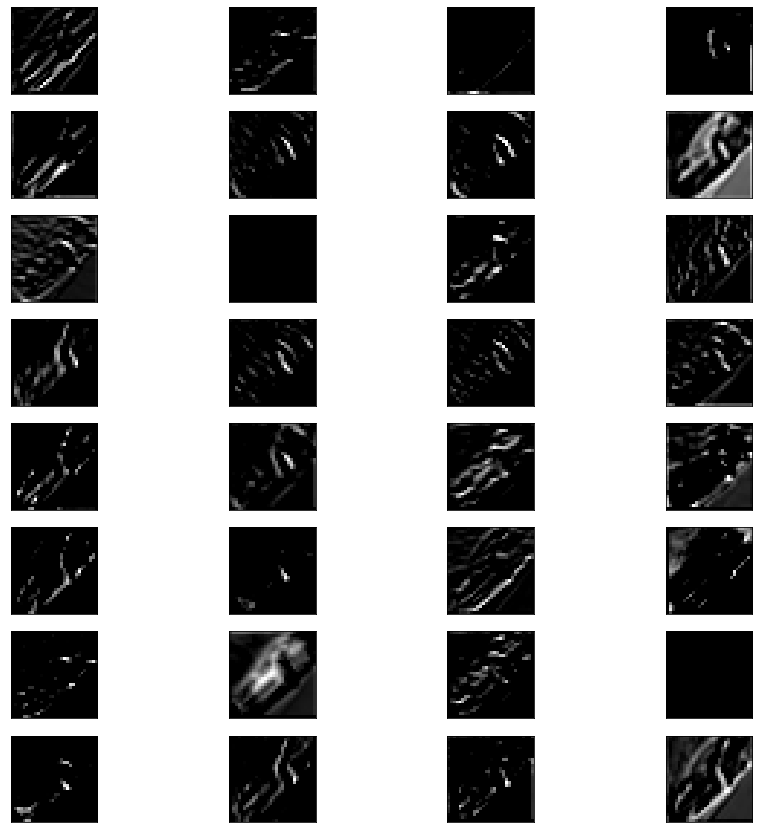

In [195]:
# redefine model to output right after the first hidden layer
modelf = Model(inputs=model.inputs, outputs=model.layers[1].output)
modelf.summary()

# expand dimensions so that it represents a single 'sample'
img = expand_dims(X_train[21], axis=0)

# get feature map for first hidden layer
feature_maps = modelf.predict(img)

# plot all 32 maps
square = 8
ix = 1
pyplot.figure(figsize=(15,15))
for i in range(square):
    # specify subplot and turn of axis
    for j in range(4):
        ax = pyplot.subplot(square, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

#### Displaying output of block 2

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
Total params: 65,568
Trainable params: 65,568
Non-trainable params: 0
_______________________________________________________

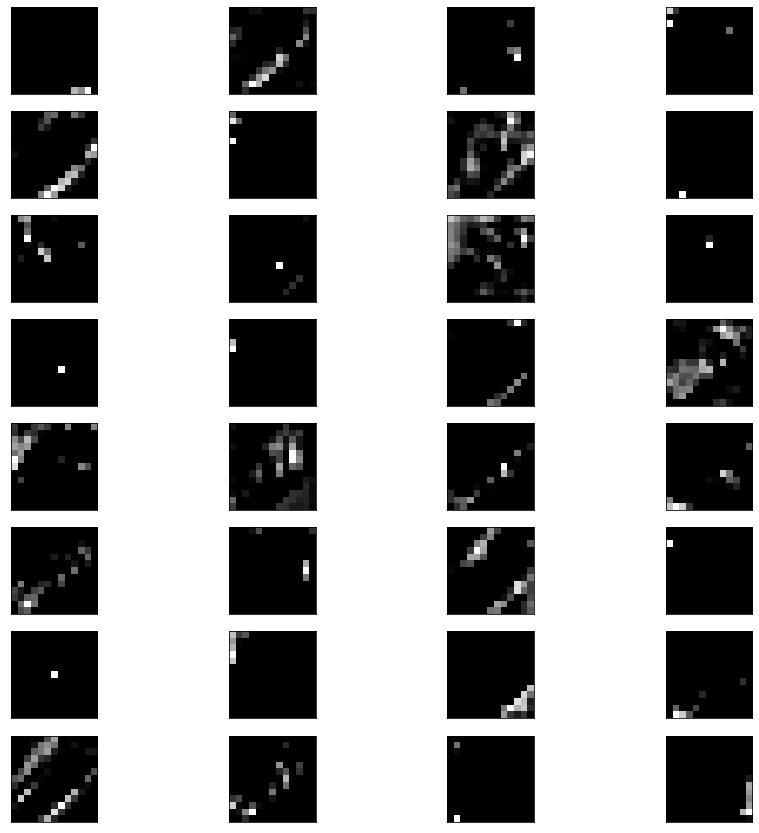

In [198]:
# redefine model to output right after the first hidden layer
modelf = Model(inputs=model.inputs, outputs=model.layers[4].output)
modelf.summary()

# expand dimensions so that it represents a single 'sample'
img = expand_dims(X_train[21], axis=0)

# get feature map for first hidden layer
feature_maps = modelf.predict(img)

# plot all 32 maps
square = 8
ix = 1
pyplot.figure(figsize=(15,15))
for i in range(square):
    # specify subplot and turn of axis
    for j in range(4):
        ax = pyplot.subplot(square, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()